In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
# we use xgboost gradient boosting decsion trees model for this experiment 
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import xgboost as xgb

import scikitplot as skplt

In [3]:
df= pd.read_csv('./data/consensus_dataset_corrected.csv')
df

,ads,consensus
0,see how you are paying for lea marquez peterso...,1
1,it is a dnc rule that a presidential candidate...,1
2,giant sharks whales and turtles oh my this no...,0
3,people with uc often worry about when their ne...,0
4,let us call this what it is republicans in con...,1
...,...,...
9913,we shall overcome from the album mourning in a...,1
9914,last day to make a yearend contribution to the...,1
9915,bts ci mco gpme sam training center in grenoble,0
9916,the face of the revolution in louisiana law in...,0


In [4]:
X_train, X_test, y_train, y_test= train_test_split( df['ads'], df['consensus'], test_size =0.2)

In [5]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tf, y_train)

accuracy:   0.996
              precision    recall  f1-score   support

no consensus       0.99      1.00      1.00       999
   consensus       1.00      0.99      1.00       985

    accuracy                           1.00      1984
   macro avg       1.00      1.00      1.00      1984
weighted avg       1.00      1.00      1.00      1984

confusion matrix:
[[999   0]
 [  8 977]]



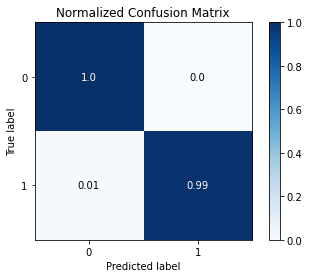

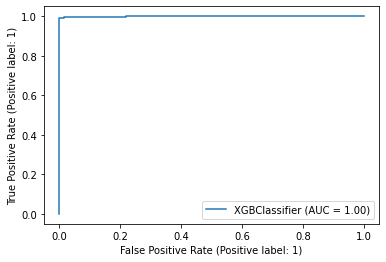

In [8]:
# predict the labels on validation dataset
predictions = xgb_clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()

skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_test_tf, y_test)

In [9]:
import string 
df_val = pd.read_csv('./data/sample_consensus.csv').drop('Unnamed: 0', axis=1)

df_val['ad'] = df_val['ad'].str.strip().str.lower() 
df_val['ad'] = df_val['ad'].str.replace('\d+', '')
df_val['ad']=  df_val['ad'].str.translate(str.maketrans('','',string.punctuation))
df_val

C:\Users\elfraiha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
5,voters want free and fair elections when im go...,1
6,massive crowds last evening for the meeting on...,1
7,several questions have come my way since the a...,0
8,brad recently stopped by to talk to henry hint...,0
9,british chickens are typically fed on soya fro...,0


accuracy:   0.643
              precision    recall  f1-score   support

no consensus       0.50      0.80      0.62         5
   consensus       0.83      0.56      0.67         9

    accuracy                           0.64        14
   macro avg       0.67      0.68      0.64        14
weighted avg       0.71      0.64      0.65        14

confusion matrix:
[[4 1]
 [4 5]]



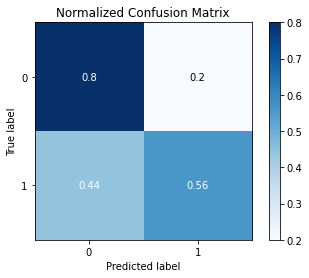

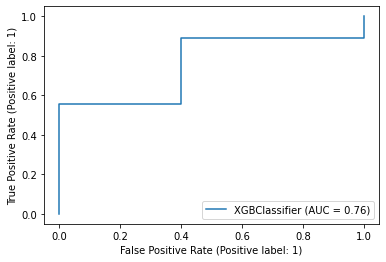

In [10]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']

y_pred = xgb_clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_val, y_val)